In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Importing data
train_sample=pd.read_csv('train-flattened.csv',nrows=500000)

train_sample.head()

C:\Users\Home\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,...,totals_visits,trafficSource_adContent,trafficSource_adwordsClickInfo,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,...,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,...,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,...,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,...,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google


In [33]:
test_sample=pd.read_csv('test-flattened.csv',nrows=200000)

C:\Users\Home\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
print(test_sample.shape,train_sample.shape)

(200000, 38) (500000, 39)


In [35]:
list(set(train_sample.columns).difference(set((test_sample.columns))))

['trafficSource_campaignCode']

In [10]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 39 columns):
channelGrouping                   500000 non-null object
customDimensions                  500000 non-null object
date                              500000 non-null int64
fullVisitorId                     500000 non-null object
hits                              500000 non-null object
socialEngagementType              500000 non-null object
visitId                           500000 non-null int64
visitNumber                       500000 non-null int64
visitStartTime                    500000 non-null int64
device_browser                    500000 non-null object
device_deviceCategory             500000 non-null object
device_isMobile                   500000 non-null bool
device_operatingSystem            500000 non-null object
geoNetwork_city                   227632 non-null object
geoNetwork_continent              500000 non-null object
geoNetwork_country                500000

In [11]:
train_sample.drop(columns=['customDimensions','hits','trafficSource_campaignCode','trafficSource_adwordsClickInfo'],inplace=True)

In [12]:
#shape of training data
train_sample.shape

(500000, 35)

In [13]:
#finding missing values in data
train_sample.isnull().sum()

channelGrouping                        0
date                                   0
fullVisitorId                          0
socialEngagementType                   0
visitId                                0
visitNumber                            0
visitStartTime                         0
device_browser                         0
device_deviceCategory                  0
device_isMobile                        0
device_operatingSystem                 0
geoNetwork_city                   272368
geoNetwork_continent                   0
geoNetwork_country                     0
geoNetwork_metro                  272368
geoNetwork_networkDomain               0
geoNetwork_region                 272368
geoNetwork_subContinent                0
totals_bounces                    244385
totals_hits                            0
totals_newVisits                  113637
totals_pageviews                      67
totals_sessionQualityDim          286282
totals_timeOnSite                 256362
totals_totalTran

In [14]:
#function to handle date
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["weekday"] = df['date'].dt.weekday #extracting week day
    df["day"] = df['date'].dt.day # extracting day
    df["month"] = df['date'].dt.month # extracting day
    df["year"] = df['date'].dt.year # extracting day
    df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df


In [15]:
train_sample=date_process(train_sample)


In [16]:
train_sample.weekday.value_counts()

4    107012
2     84423
1     77500
0     72503
3     67329
5     50646
6     40587
Name: weekday, dtype: int64

In [17]:
#categorical_features
categorical_features=train_sample.select_dtypes(include=np.object)
categorical_features.columns

Index(['channelGrouping', 'fullVisitorId', 'socialEngagementType',
       'device_browser', 'device_deviceCategory', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'trafficSource_adContent',
       'trafficSource_campaign', 'trafficSource_isTrueDirect',
       'trafficSource_keyword', 'trafficSource_medium',
       'trafficSource_referralPath', 'trafficSource_source'],
      dtype='object')

In [170]:
#numerical features
numerical_df=train_sample.select_dtypes(include=np.number)
numerical_df.columns

Index(['visitId', 'visitNumber', 'visitStartTime', 'totals_hits',
       'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'weekday', 'day', 'month', 'year', 'visitHour'],
      dtype='object')

In [18]:
#drop columns hav one unique values
const_column=[col for col in train_sample.columns if train_sample[col].nunique()==1]


In [19]:
const_column

['socialEngagementType',
 'totals_bounces',
 'totals_newVisits',
 'totals_visits',
 'trafficSource_isTrueDirect']

In [20]:
#dropping those column
train_sample=train_sample.drop(columns=const_column)

In [21]:
train_sample.shape

(500000, 35)

In [22]:
#handling missing value
def fill_missing(train_sample):
    count=train_sample.isnull().sum().sort_values(ascending=False)
    percent=(train_sample.isnull().sum()/train_sample.isnull().count()*100).sort_values(ascending=False)
    df=pd.concat([count,percent],axis=1,keys=['total','percent'])
    return df[df['total']!=0]

In [23]:
df=fill_missing(train_sample)

# Missing values in dataset

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


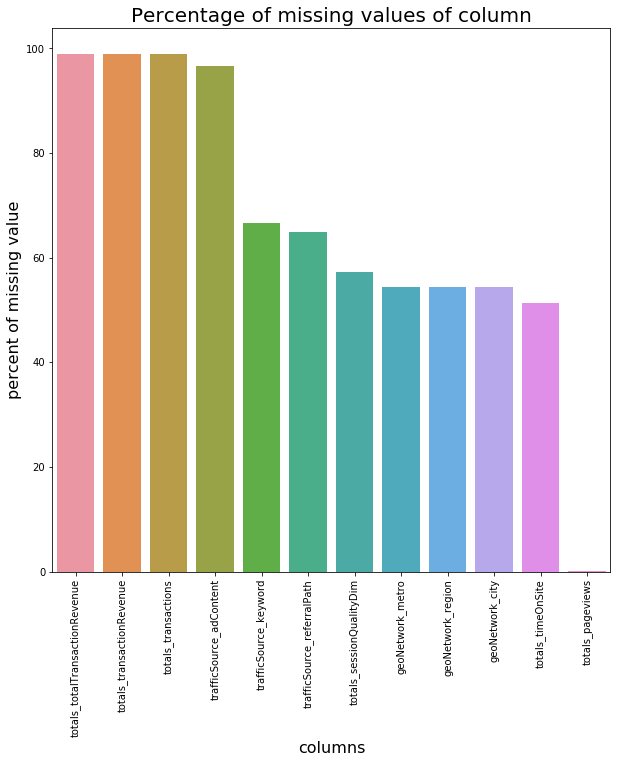

In [34]:
plt.figure(figsize=[10,10])
sns.barplot(x=df.index,y=df.percent)
plt.title("Percentage of missing values of column", fontsize=20) # Adding Title and seting the size
plt.xlabel("columns", fontsize=16) # Adding x label and seting the size
plt.ylabel("percent of missing value", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=90) # Adjust the xticks, rotating the labels

plt.show()

The plot shows that only 1 percent of customers produce transaction rvenue. tARGET VARIABLE : TRANSACTION REVENUE. 


In [35]:
#fill missing values
def FillingNaValues(df):    # fillna numeric feature
    df['totals_pageviews']=df['totals_pageviews'].fillna(0).astype(float) #filling NA's with 1
    df["totals_transactionRevenue"] = df["totals_transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals_totalTransactionRevenue']=df['totals_totalTransactionRevenue'].fillna(0.0).astype(float)
    df['totals_sessionQualityDim']=df['totals_sessionQualityDim'].fillna(0.0).astype(float)
    df['totals_timeOnSite']=df['totals_timeOnSite'].fillna(0.0).astype(float)
    df['totals_transactions']=df['totals_transactions'].fillna(0.0).astype(float)
    return df #return the transformed dataframe


In [36]:
train_sample.loc[train_sample['geoNetwork_city'] == "(not set)", 'geoNetwork_city'] = np.nan
train_sample['geoNetwork_city'].fillna("NaN", inplace=True)


In [37]:
train_sample.loc[train_sample['geoNetwork_metro'] == "(not set)", 'geoNetwork_metro'] = np.nan
train_sample['geoNetwork_metro'].fillna("NaN", inplace=True)
train_sample.loc[train_sample['geoNetwork_region'] == "(not set)", 'geoNetwork_region'] = np.nan
train_sample['geoNetwork_region'].fillna("NaN", inplace=True)
train_sample.loc[train_sample['trafficSource_campaign'] == "(not set)", 'trafficSource_campaign'] = np.nan
train_sample['trafficSource_campaign'].fillna("NaN", inplace=True)
train_sample.loc[train_sample['trafficSource_medium'] == "(not set)", 'trafficSource_medium'] = np.nan
train_sample['trafficSource_medium'].fillna("NaN", inplace=True)
train_sample.loc[train_sample['trafficSource_medium'] == "(none)", 'trafficSource_medium'] = np.nan
train_sample['trafficSource_medium'].fillna("NaN", inplace=True)
train_sample.loc[train_sample['trafficSource_keyword'] == "(not provided)", 'trafficSource_keyword'] = np.nan
train_sample['trafficSource_keyword'].fillna("NaN", inplace=True)



In [38]:
#filling missing value with zero
train_sample=FillingNaValues(train_sample)

In [39]:
train_sample.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_hits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'trafficSource_adContent',
       'trafficSource_campaign', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'weekday', 'day', 'month', 'year', 'visitHour'],
      dtype='object')

In [40]:
train_sample.shape

(500000, 35)

# Exploratory Data anlysis

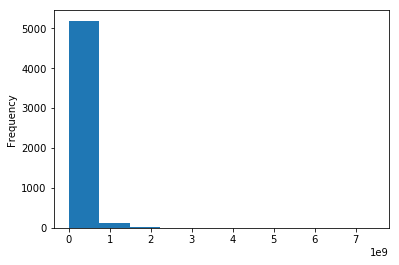

In [42]:
#Lets analyze target variable
train_sample.totals_transactionRevenue[train_sample.totals_transactionRevenue>0.0].plot(kind='hist')

In [48]:
(train_sample.totals_transactionRevenue[train_sample.totals_transactionRevenue>0.0].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]))

count    5.325000e+03
mean     1.196899e+08
std      2.587584e+08
min      4.000000e+04
5%       1.047400e+07
10%      1.519000e+07
25%      2.499000e+07
50%      4.798000e+07
75%      1.044800e+08
90%      2.665180e+08
95%      4.867940e+08
99%      1.169807e+09
max      7.427430e+09
Name: totals_transactionRevenue, dtype: float64

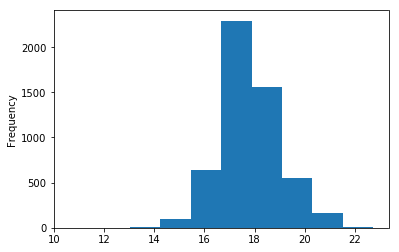

In [45]:

np.log(train_sample.totals_transactionRevenue[train_sample.totals_transactionRevenue>0.0]).plot(kind='hist')



Revenue varaible histogram shows that values are skewed. The plot is highly distorted from symmetrical normal curve.Statistic of this variable shows that variation in the mean and median shows the presence of outlier. Mean is higher than median shows the extreme value presence in right side of the curve. 
Taking logarthimic make the data to normality


In [50]:
np.log(train_sample.totals_transactionRevenue[train_sample.totals_transactionRevenue>0.0]).describe()

count    5325.000000
mean       17.805801
std         1.169971
min        10.596635
25%        17.033986
50%        17.686295
75%        18.464506
max        22.728446
Name: totals_transactionRevenue, dtype: float64

After log transformation, mean and median values are similar.It reduces the effect of extreme values.

Channel Grouping: To identify, through  which channel customer acess the GS store. So that might give insight to marketers to concentrate on those channels

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


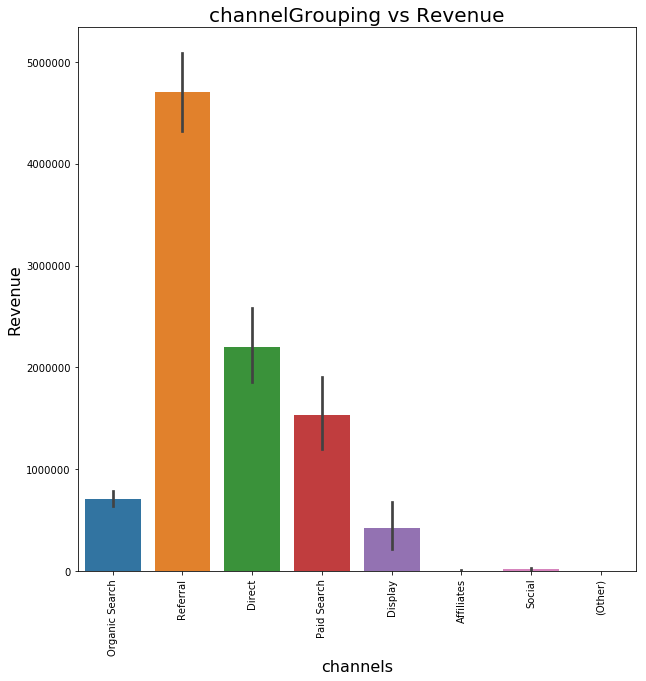

In [60]:
plt.figure(figsize=[10,10])
sns.barplot(x=train_sample.channelGrouping,y=train_sample.totals_transactionRevenue)
plt.title("channelGrouping vs Revenue", fontsize=20) # Adding Title and seting the size
plt.xlabel("channels", fontsize=16) # Adding x label and seting the size
plt.ylabel("percent of missing value", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=90) # Adjust the xticks, rotating the labels

plt.show()

The above plot shows the frequent usage of channels to access the GS store is Organic search. But customer accessed GS store through referral channel produced high revenue. This plot gives marketing team an idea to improve investment on appropriate channel to gather customer attentions.

Device information

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


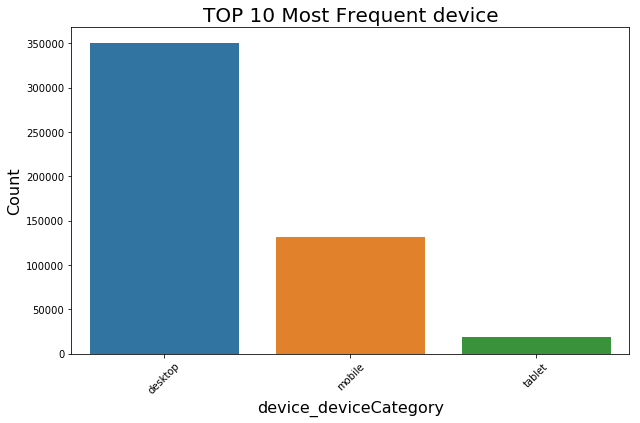

In [66]:
# seting the graph size
plt.figure(figsize=(10,6))
sns.countplot(train_sample[train_sample['device_deviceCategory'].isin(train_sample.device_deviceCategory.value_counts()[:10].index.values)]['device_deviceCategory'])
plt.title("TOP 10 Most Frequent device", fontsize=20) # Adding Title and seting the size
plt.xlabel("device_deviceCategory", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


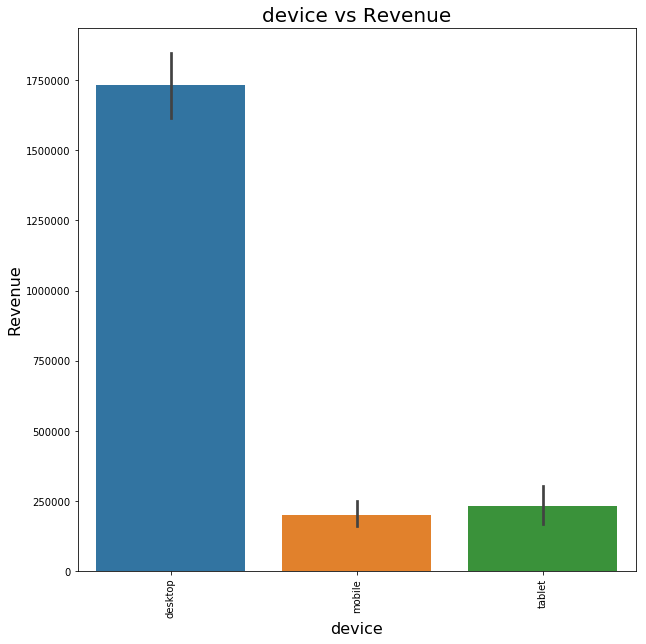

In [67]:
plt.figure(figsize=[10,10])
sns.barplot(x=train_sample.device_deviceCategory,y=train_sample.totals_transactionRevenue)
plt.title("device vs Revenue", fontsize=20) # Adding Title and seting the size
plt.xlabel("device", fontsize=16) # Adding x label and seting the size
plt.ylabel("Revenue", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=90) # Adjust the xticks, rotating the labels

plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


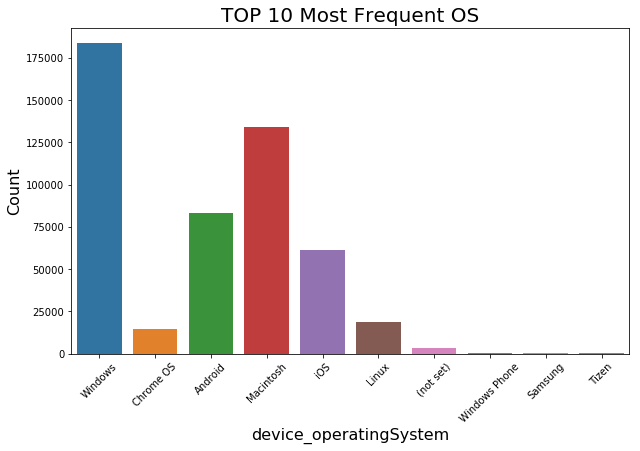

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(train_sample[train_sample['device_operatingSystem'].isin(train_sample.device_operatingSystem.value_counts()[:10].index.values)]['device_operatingSystem'])
plt.title("TOP 10 Most Frequent OS", fontsize=20) # Adding Title and seting the size
plt.xlabel("device_operatingSystem", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show()

In [71]:

count=train_sample.device_operatingSystem.value_counts()
percent=(train_sample.device_operatingSystem.value_counts()/len(train_sample)*100)
df=pd.concat([count,percent],axis=1,keys=['total','percent'])
df

,total,percent
Windows,183603,36.7206
Macintosh,134154,26.8308
Android,83434,16.6868
iOS,61244,12.2488
Linux,18613,3.7226
Chrome OS,14543,2.9086
(not set),3207,0.6414
Windows Phone,515,0.1030
Samsung,242,0.0484
Tizen,174,0.0348


In [79]:
df_os=train_sample.pivot_table(values='totals_transactionRevenue',index='device_operatingSystem',aggfunc=sum)

In [82]:
df_os.sort_values(by='totals_transactionRevenue',ascending=False,inplace=True)

In [83]:
df_os['percent_revenue']=df_os.totals_transactionRevenue/sum(train_sample.totals_transactionRevenue)*100

In [87]:

tab_rev_OS=df.join(df_os,how='inner')

In [92]:
tab_rev_OS_final=tab_rev_OS[(tab_rev_OS.percent>0.1 )| (tab_rev_OS.percent_revenue>0.1)]

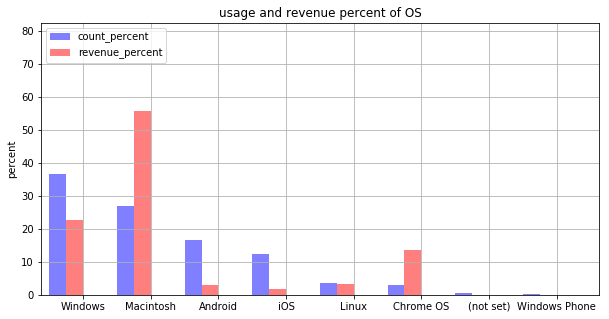

In [100]:
pos = list(range(len(tab_rev_OS_final['percent']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        tab_rev_OS_final['percent'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=tab_rev_OS_final.index[0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
         tab_rev_OS_final['percent_revenue'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=tab_rev_OS_final.index[1]) 
# Set the y axis label
ax.set_ylabel('percent')

# Set the chart's title
ax.set_title('usage and revenue percent of OS')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tab_rev_OS_final.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(tab_rev_OS_final['percent'] + tab_rev_OS_final['percent_revenue'])] )

# Adding the legend and showing the plot
plt.legend(['count_percent', 'revenue_percent'], loc='upper left')
plt.grid()
plt.show()


In [125]:
# function find percentage of usage and revenue by users.
def plot_cat_rev(data,col='None',revenue='None',per=0.1):
    count=data[col].value_counts()
    percent=(data[col].value_counts()/len(data)*100)
    df=pd.concat([count,percent],axis=1,keys=['total','percent'])
    df_col=data.pivot_table(values=revenue,index=col,aggfunc=sum)
    df_col['percent_revenue']=df_col[revenue]/sum(data[revenue])*100
    tab_rev_col=df.join(df_col,how='inner')
    tab_rev_col_final=tab_rev_col[(tab_rev_col.percent>per )| (tab_rev_col.percent_revenue>per)]
    pos = list(range(len(tab_rev_col_final['percent']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,10))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
        #using df['pre_score'] data,
        tab_rev_col_final['percent'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=tab_rev_col_final.index[0]) 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
         tab_rev_col_final['percent_revenue'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=tab_rev_col_final.index[1]) 
    # Set the y axis label
    ax.set_ylabel('percent')

    # Set the chart's title
    ax.set_title('usage and revenue percent of'+col)

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(tab_rev_col_final.index,rotation=45)

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(tab_rev_col_final['percent'] + tab_rev_col_final['percent_revenue'])] )

    # Adding the legend and showing the plot
    plt.legend(['count_percent', 'revenue_percent'], loc='upper left')
    plt.grid()
    plt.show()

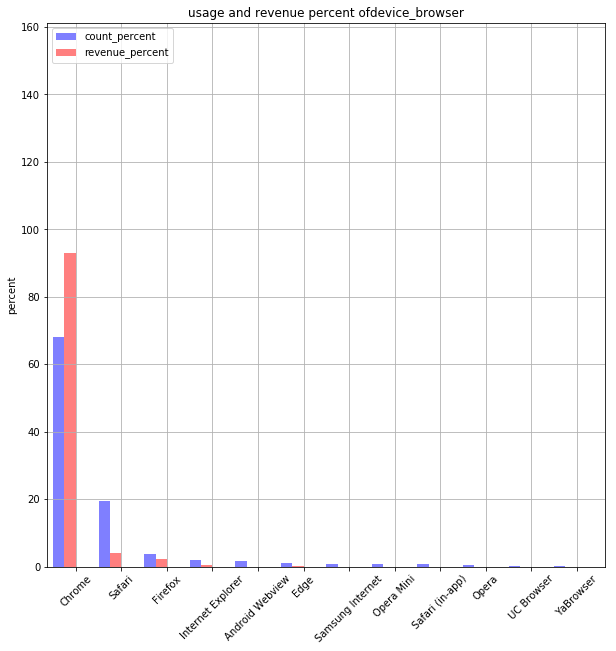

In [118]:
plot_cat_rev(train_sample,'device_browser','totals_transactionRevenue')

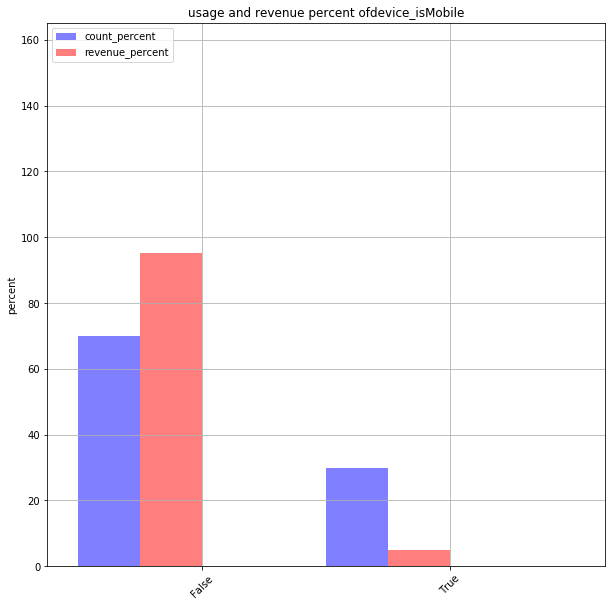

In [119]:
plot_cat_rev(train_sample,'device_isMobile','totals_transactionRevenue')

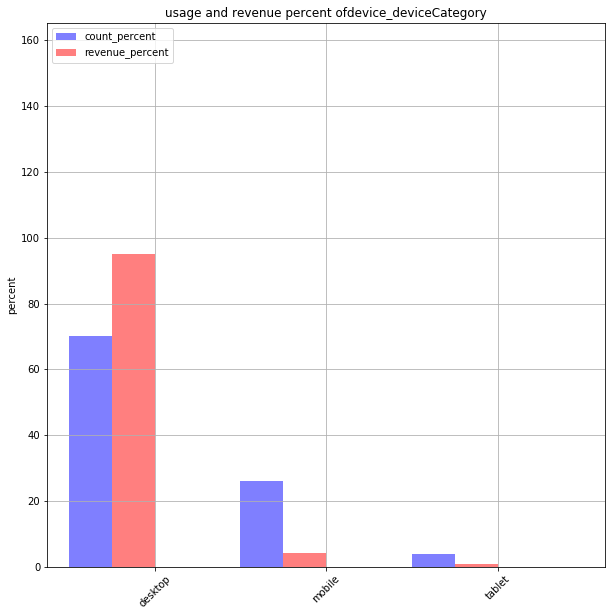

In [120]:
plot_cat_rev(train_sample,'device_deviceCategory','totals_transactionRevenue')

Geo attributes

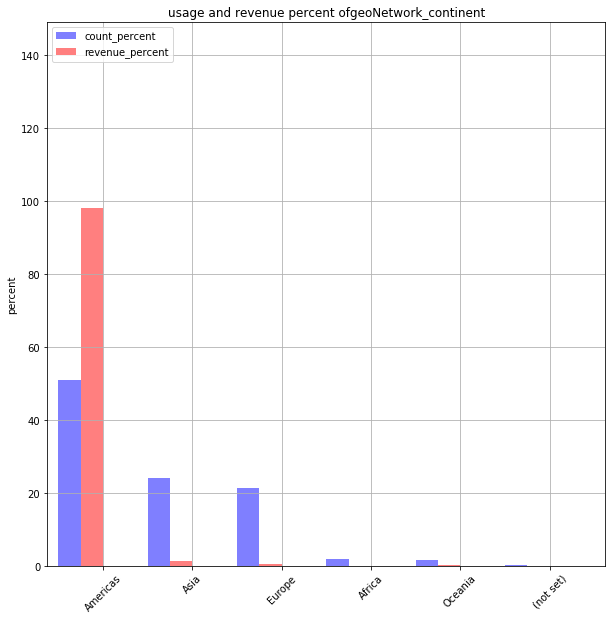

In [123]:
plot_cat_rev(train_sample,'geoNetwork_continent','totals_transactionRevenue')

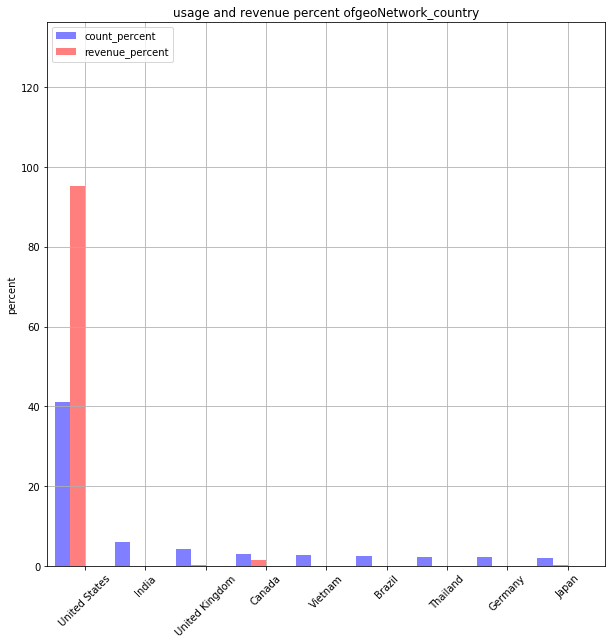

In [130]:
plot_cat_rev(train_sample,'geoNetwork_country','totals_transactionRevenue',2)

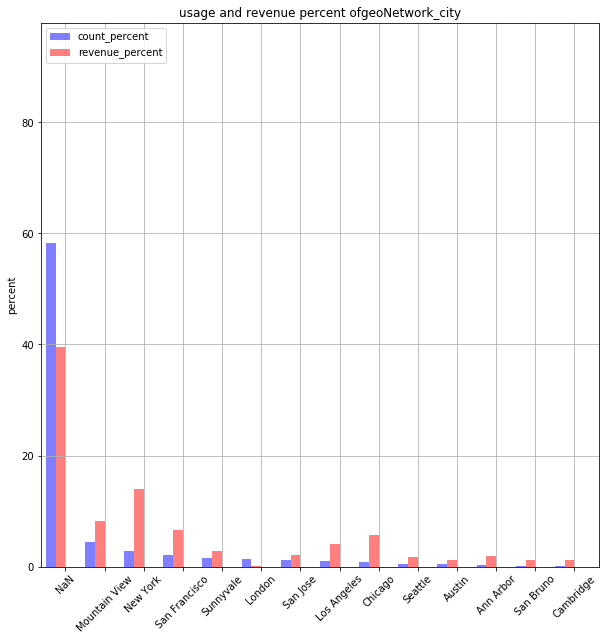

In [134]:
plot_cat_rev(train_sample,'geoNetwork_city','totals_transactionRevenue',1)

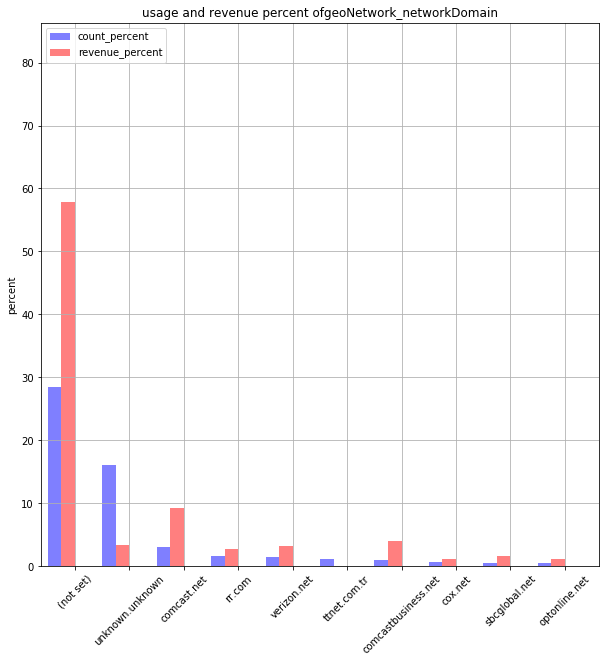

In [137]:
plot_cat_rev(train_sample,'geoNetwork_networkDomain','totals_transactionRevenue',1)

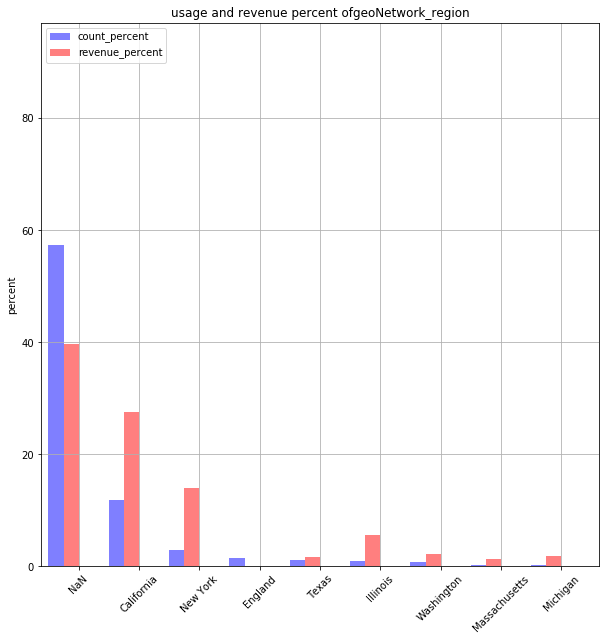

In [141]:
plot_cat_rev(train_sample,'geoNetwork_region','totals_transactionRevenue',1)

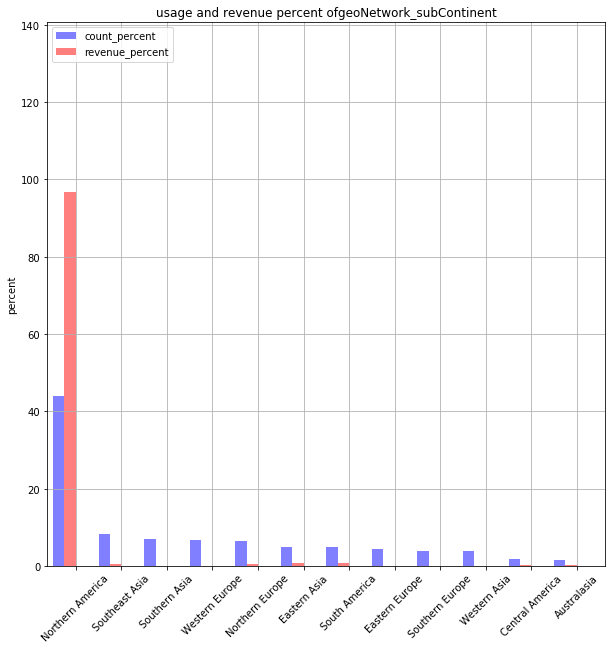

In [143]:
plot_cat_rev(train_sample,'geoNetwork_subContinent','totals_transactionRevenue',1)

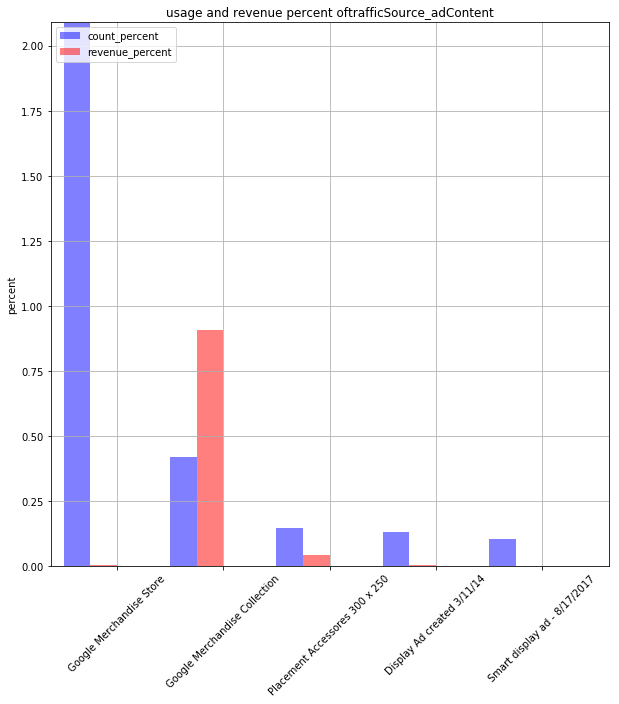

In [145]:
plot_cat_rev(train_sample,'trafficSource_adContent','totals_transactionRevenue')

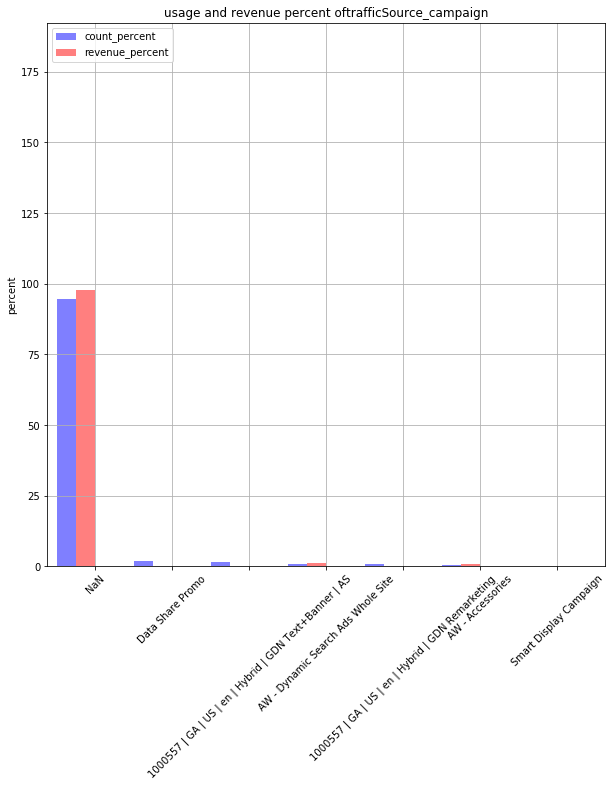

In [146]:
plot_cat_rev(train_sample,'trafficSource_campaign','totals_transactionRevenue')

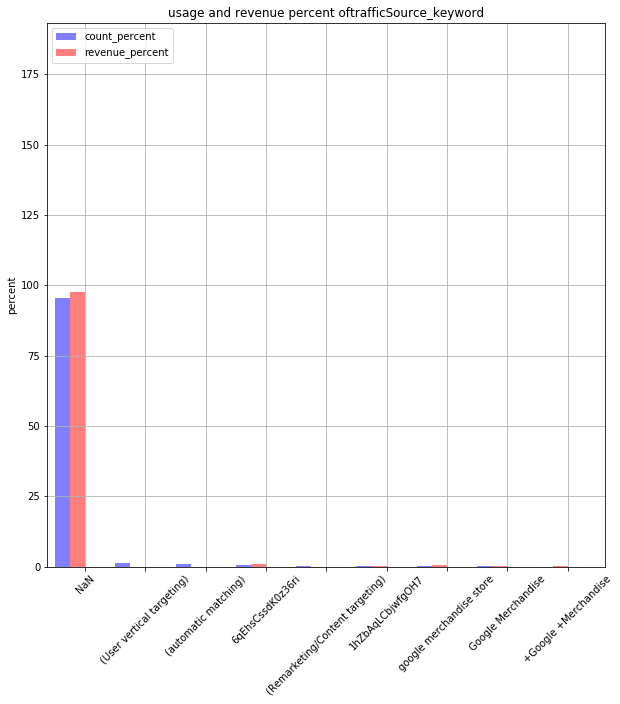

In [147]:
plot_cat_rev(train_sample,'trafficSource_keyword','totals_transactionRevenue')

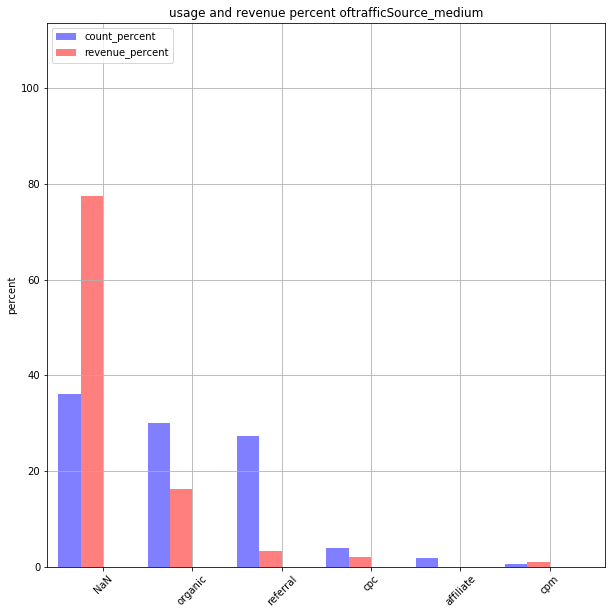

In [148]:
plot_cat_rev(train_sample,'trafficSource_medium','totals_transactionRevenue')

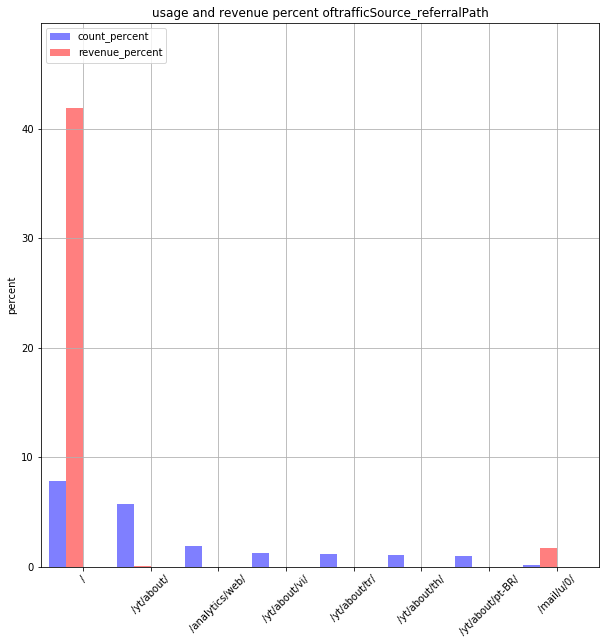

In [150]:
plot_cat_rev(train_sample,'trafficSource_referralPath','totals_transactionRevenue',1)

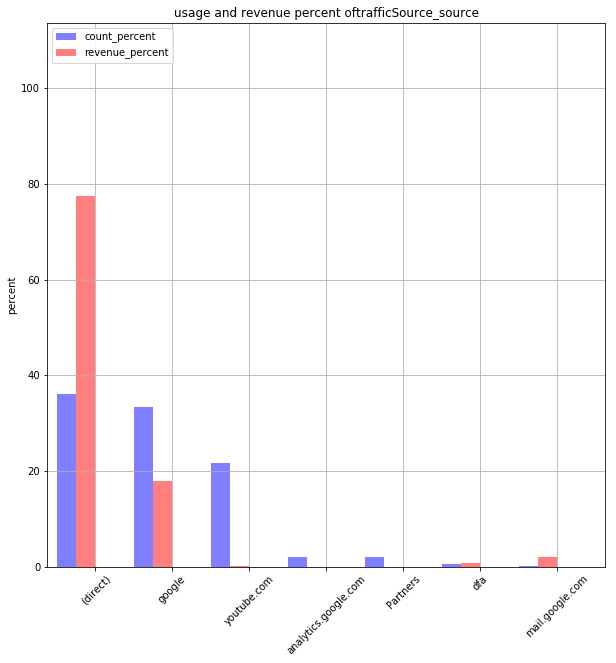

In [152]:
plot_cat_rev(train_sample,'trafficSource_source','totals_transactionRevenue',0.5)

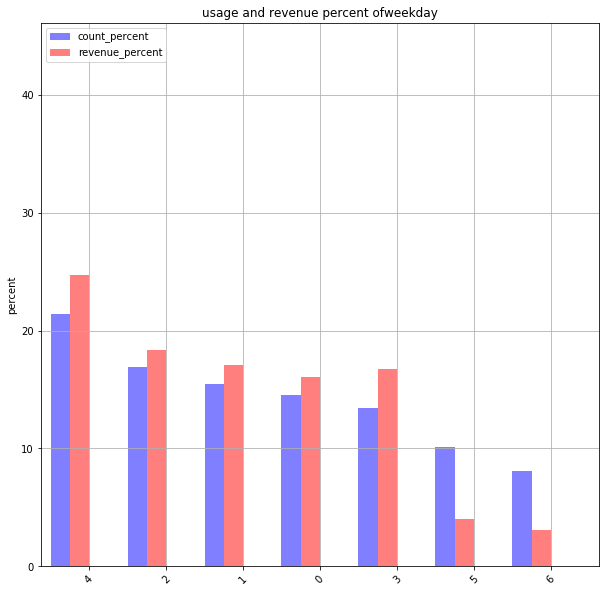

In [153]:
plot_cat_rev(train_sample,'weekday','totals_transactionRevenue')

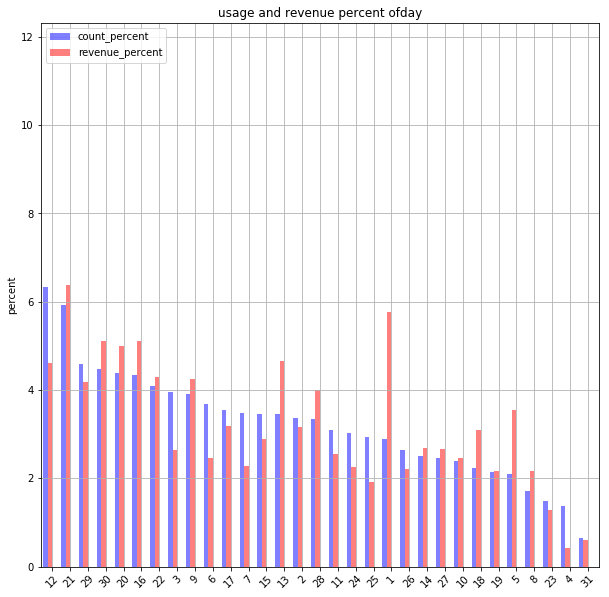

In [154]:
plot_cat_rev(train_sample,'day','totals_transactionRevenue')

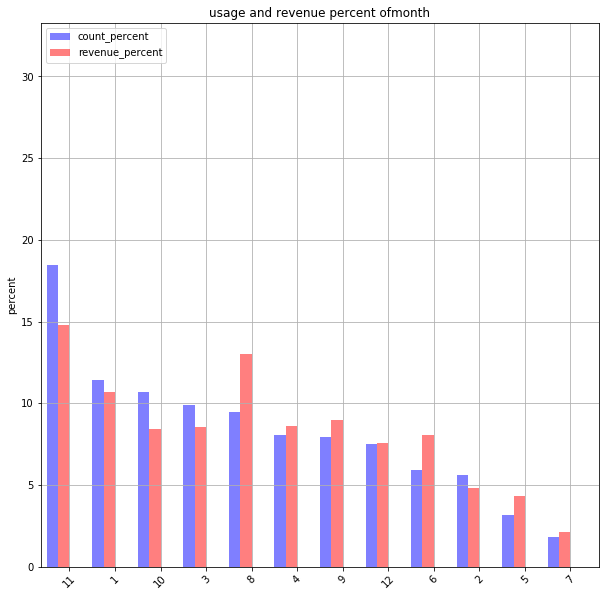

In [155]:
plot_cat_rev(train_sample,'month','totals_transactionRevenue')

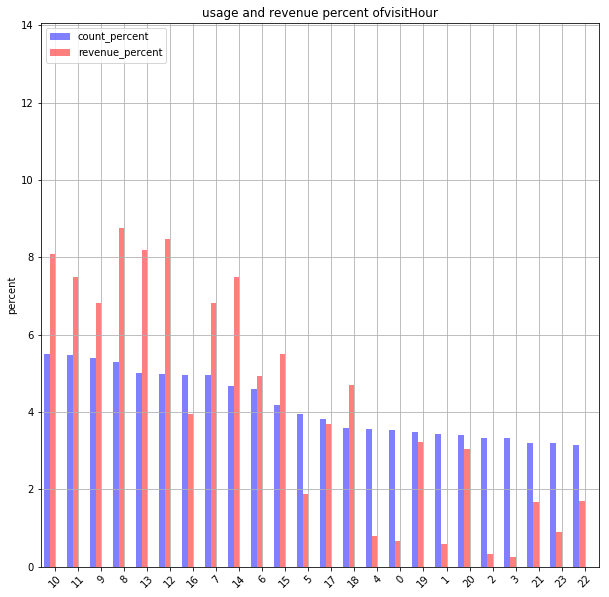

In [156]:
plot_cat_rev(train_sample,'visitHour','totals_transactionRevenue')

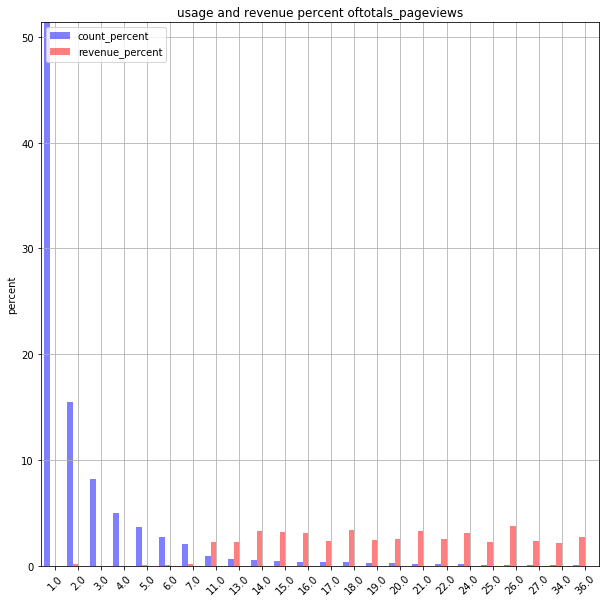

In [163]:
plot_cat_rev(train_sample,'totals_pageviews','totals_transactionRevenue',2)

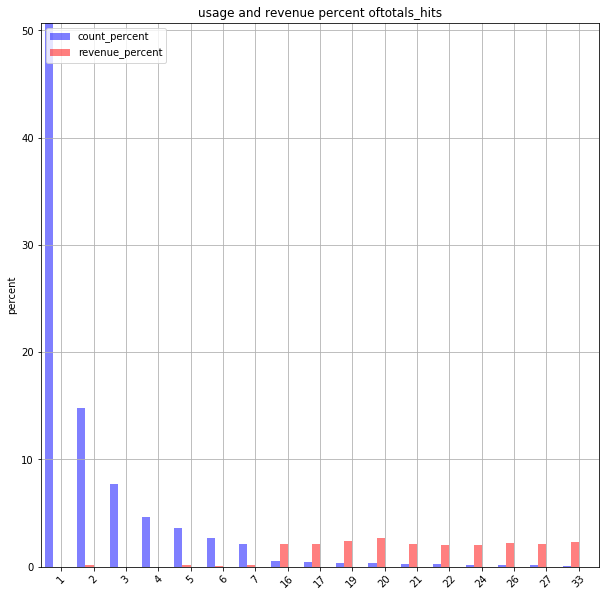

In [167]:
plot_cat_rev(train_sample,'totals_hits','totals_transactionRevenue',2)

# Summary statistics of Numeric and categorical variable

In [174]:
categorical_features.describe()

,channelGrouping,fullVisitorId,socialEngagementType,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,trafficSource_adContent,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
count,500000,500000,500000,500000,500000,500000,227632,500000,500000,227632,500000,227632,500000,17040,500000,153784,166535,500000,175674,500000
unique,8,432700,1,53,3,23,620,6,214,93,20833,384,23,69,30,1,1611,7,1894,238
top,Organic Search,1957458976293878100,Not Socially Engaged,Chrome,desktop,Windows,Mountain View,Americas,United States,(not set),(not set),California,Northern America,Google Merchandise Store,(not set),True,(not provided),(none),/,(direct)
freq,208358,117,500000,341079,350359,183603,21996,254797,205142,116675,142675,59683,219678,10436,472249,153784,144330,180882,39027,180883


In [171]:
numerical_df.describe()

,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,weekday,day,month,year,visitHour
count,5.000000e+05,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.496064e+09,2.309296,1.496064e+09,4.344710,3.633032,1.565560,120.740650,1.418937e+06,1.274698e+06,0.011106,2.746266,16.083860,6.963092,2016.868372,11.290492
std,1.621009e+07,9.367667,1.621009e+07,8.866064,6.398356,7.507403,347.093783,3.373622e+07,2.939204e+07,0.111188,1.838283,8.623847,3.769828,0.694495,6.373751
min,1.470207e+09,1.000000,1.470208e+09,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000
25%,1.480410e+09,1.000000,1.480410e+09,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,9.000000,3.000000,2016.000000,6.000000
50%,1.494902e+09,1.000000,1.494902e+09,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,3.000000,16.000000,8.000000,2017.000000,11.000000
75%,1.510762e+09,1.000000,1.510762e+09,4.000000,3.000000,1.000000,72.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,23.000000,11.000000,2017.000000,16.000000
max,1.525072e+09,457.000000,1.525072e+09,500.000000,400.000000,99.000000,11094.000000,7.435430e+09,7.427430e+09,8.000000,6.000000,31.000000,12.000000,2018.000000,23.000000


In [121]:
train_sample.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_hits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'trafficSource_adContent',
       'trafficSource_campaign', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'weekday', 'day', 'month', 'year', 'visitHour'],
      dtype='object')

# Displaying frequency of each factor in categorical variable

In [63]:
#Filter categorical variables
categorical_columns = [x for x in train_sample.dtypes.index if train_sample.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['fullVisitorId']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible:',col)
    print (train_sample[col].value_counts()[:10])


Frequency of Categories for varible: channelGrouping
Organic Search    208358
Social            114715
Direct             79516
Referral           60963
Display            13764
Paid Search        13144
Affiliates          9511
(Other)               29
Name: channelGrouping, dtype: int64

Frequency of Categories for varible: device_browser
Chrome               341079
Safari                96941
Firefox               18553
Internet Explorer     10391
Android Webview        8639
Edge                   5735
Samsung Internet       4337
Opera Mini             4113
Safari (in-app)        3443
Opera                  2667
Name: device_browser, dtype: int64

Frequency of Categories for varible: device_deviceCategory
desktop    350359
mobile     130987
tablet      18654
Name: device_deviceCategory, dtype: int64

Frequency of Categories for varible: device_operatingSystem
Windows          183603
Macintosh        134154
Android           83434
iOS               61244
Linux             18613
Chrom

# Aggregating data on monthly level for each User

In [ ]:
#aggregating numeric column by mean for each user on monthly level
train_gbm=train_sample.groupby(['fullVisitorId','year','month'])['totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'].mean()

In [ ]:
print(train_gbm.isnull().sum())
train_gbm.shape

In [ ]:
#aggregating categorical column by mode for each user on monthly level
column=['channelGrouping','device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent','trafficSource_campaign', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_source']
for col in column:
    df_train=train_sample.groupby(['fullVisitorId','year','month'])[col].agg(lambda x: x.value_counts()[:1].index[0])
    temp=pd.DataFrame(df_train)
    temp.reset_index(inplace=True)
    train_gbm=pd.merge(train_gbm,temp,how='inner',on=['fullVisitorId','year','month'])
    

In [68]:
print(train_gbm.columns)
train_gbm.shape

Index(['fullVisitorId', 'year', 'month', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'channelGrouping', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'trafficSource_campaign',
       'trafficSource_keyword', 'trafficSource_medium',
       'trafficSource_source'],
      dtype='object')


(445703, 25)

In [66]:
train_gbm.columns

Index(['fullVisitorId', 'year', 'month', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'channelGrouping', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'trafficSource_campaign',
       'trafficSource_keyword', 'trafficSource_medium'],
      dtype='object')

In [69]:
train_gbm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445703 entries, 0 to 445702
Data columns (total 25 columns):
fullVisitorId                     445703 non-null object
year                              445703 non-null int64
month                             445703 non-null int64
totals_pageviews                  445703 non-null float64
totals_sessionQualityDim          445703 non-null float64
totals_timeOnSite                 445703 non-null float64
totals_totalTransactionRevenue    445703 non-null float64
totals_transactionRevenue         445703 non-null float64
totals_transactions               445703 non-null float64
channelGrouping                   445703 non-null object
device_browser                    445703 non-null object
device_deviceCategory             445703 non-null object
device_isMobile                   445703 non-null bool
device_operatingSystem            445703 non-null object
geoNetwork_city                   445703 non-null object
geoNetwork_continent            

In [70]:
#Filter categorical variables
categorical_columns = [x for x in train_gbm.dtypes.index if train_gbm.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['fullVisitorId']]
#Print frequency of categories
series=pd.Series()
for col in categorical_columns:
    print ('\nFrequency of Categories for varible:',col)
    print((train_gbm[col].value_counts()/(len(train_gbm[col]))*100 ))
    series.append((train_gbm[col].value_counts()/(len(train_gbm[col]))*100 ),ignore_index=True)
 


Frequency of Categories for varible: channelGrouping
Organic Search    41.805642
Social            24.943965
Direct            15.232565
Referral          11.213297
Display            2.461280
Paid Search        2.449613
Affiliates         1.889150
(Other)            0.004487
Name: channelGrouping, dtype: float64

Frequency of Categories for varible: device_browser
Chrome                                                  67.050255
Safari                                                  20.059546
Firefox                                                  3.774038
Internet Explorer                                        2.212011
Android Webview                                          1.850560
Edge                                                     1.184870
Opera Mini                                               0.892747
Samsung Internet                                         0.811976
Safari (in-app)                                          0.740403
Opera                                

Frequency of Categories for varible: geoNetwork_region
NaN                             58.459557
California                      11.067011
New York                         2.693722
England                          1.464652
Texas                            1.127432
Bangkok                          0.900151
Illinois                         0.840021
Maharashtra                      0.822296
Washington                       0.816463
Ho Chi Minh                      0.700018
Istanbul                         0.683415
Ontario                          0.680947
Delhi                            0.661876
Karnataka                        0.657164
Hanoi                            0.612740
Taipei City                      0.564277
State of Sao Paulo               0.539373
Tamil Nadu                       0.517161
New South Wales                  0.507737
Telangana                        0.467127
Ile-de-France                    0.464435
County Dublin                    0.437287
Jakarta              

Frequency of Categories for varible: trafficSource_medium
NaN          34.523663
organic      30.493625
referral     29.225964
cpc           3.409445
affiliate     1.872099
cpm           0.475204
Name: trafficSource_medium, dtype: float64

Frequency of Categories for varible: trafficSource_source
(direct)                         34.928865
google                           33.125198
youtube.com                      23.688645
analytics.google.com              1.959825
Partners                          1.840912
google.com                        0.490237
sites.google.com                  0.419786
dfa                               0.373567
baidu                             0.307828
m.facebook.com                    0.293469
googleads.g.doubleclick.net       0.280231
qiita.com                         0.197217
reddit.com                        0.193851
quora.com                         0.176575
bing                              0.174331
siliconvalley.about.com           0.137087
facebook.com  

# Combining Low frequency categories
Grouping categories with less percentage into one subset


In [71]:
# Device browser
train_gbm[train_gbm.totals_transactionRevenue>0.0]['device_browser'].value_counts()

Chrome               4655
Safari                364
Firefox               106
Internet Explorer      47
Edge                   17
Safari (in-app)         3
Opera                   3
Samsung Internet        2
Android Webview         1
Name: device_browser, dtype: int64

The above categories should be included bcoz these browser usage by customer contributes to revenue. When compared this count with percentage of categories , grouping categories  which has less than 0.1 into other category 


In [72]:
#group the factor  to other if the percentage of count is less tahn 0.1 
series = pd.value_counts(train_gbm.device_browser)
mask = (series/series.sum() * 100).lt(0.1)
# To replace df['column'] use np.where I.e 
train_gbm['device_browser'] = np.where(train_gbm['device_browser'].isin(series[mask].index),'Other',train_gbm['device_browser'])

In [ ]:
train_gbm.device_browser.value_counts()

In [73]:
for col in categorical_columns:
    series = pd.value_counts(train_gbm[col])
    mask = (series/series.sum() * 100).lt(0.1)
# To replace df['column'] use np.where I.e 
    train_gbm[col] = np.where(train_gbm[col].isin(series[mask].index),'Other',train_gbm[col])
    

In [74]:
train_gbm.columns

Index(['fullVisitorId', 'year', 'month', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'channelGrouping', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'trafficSource_campaign',
       'trafficSource_keyword', 'trafficSource_medium',
       'trafficSource_source'],
      dtype='object')

In [75]:
series=pd.Series()

for col in categorical_columns:
    series=series.append(train_gbm[col].value_counts())

In [76]:
cat=series.index[series.index!='Other']

In [77]:
case={}
seq=categorical_columns
for col in categorical_columns:
    value=(train_gbm[col].value_counts()).index[(train_gbm[col].value_counts()).index!='Other']
    case=dict.fromkeys(seq,value)

In [78]:
case['channelGrouping']

Index(['(direct)', 'google', 'youtube.com', 'analytics.google.com', 'Partners',
       'google.com', 'sites.google.com', 'dfa', 'baidu', 'm.facebook.com',
       'googleads.g.doubleclick.net', 'qiita.com', 'reddit.com', 'quora.com',
       'bing', 'siliconvalley.about.com', 'facebook.com', 'yahoo',
       'mail.google.com', 't.co', 'groups.google.com'],
      dtype='object')

In [80]:
#writing train_gbm output
train_gbm.to_csv("train_gbm.csv")

# Preparing Test data

In [81]:
#preprocessing test data

test_sample.drop(columns=['customDimensions','hits','trafficSource_adwordsClickInfo'],inplace=True)


In [82]:
test_sample.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions', 'totals_visits',
       'trafficSource_adContent', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source'],
      dtype='object')

In [83]:
test_sample=date_process(test_sample)


In [84]:
const_column=[col for col in test_sample.columns if test_sample[col].nunique()==1]
const_column=[x for x in const_column if x not in ['year']]
const_column
test_sample=test_sample.drop(columns=const_column)
df=fill_missing(test_sample)


In [85]:
df

,total,percent
totals_transactionRevenue,197827,98.9135
totals_totalTransactionRevenue,197827,98.9135
totals_transactions,196941,98.4705
geoNetwork_region,103233,51.6165
geoNetwork_city,103233,51.6165
geoNetwork_metro,103233,51.6165
totals_timeOnSite,91733,45.8665
trafficSource_keyword,19522,9.7610
totals_pageviews,60,0.0300


In [86]:
#filling missing value with zero
test_sample=FillingNaValues(test_sample)

In [87]:
test_sample.loc[test_sample['geoNetwork_city'] == "(not set)", 'geoNetwork_city'] = np.nan
test_sample['geoNetwork_city'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['geoNetwork_metro'] == "(not set)", 'geoNetwork_metro'] = np.nan
test_sample['geoNetwork_metro'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['geoNetwork_region'] == "(not set)", 'geoNetwork_region'] = np.nan
test_sample['geoNetwork_region'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['trafficSource_campaign'] == "(not set)", 'trafficSource_campaign'] = np.nan
test_sample['trafficSource_campaign'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['trafficSource_medium'] == "(not set)", 'trafficSource_medium'] = np.nan
test_sample['trafficSource_medium'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['trafficSource_medium'] == "(none)", 'trafficSource_medium'] = np.nan
test_sample['trafficSource_medium'].fillna("NaN", inplace=True)
test_sample.loc[test_sample['trafficSource_keyword'] == "(not provided)", 'trafficSource_keyword'] = np.nan
test_sample['trafficSource_keyword'].fillna("NaN", inplace=True)


In [88]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 35 columns):
channelGrouping                   200000 non-null object
date                              200000 non-null datetime64[ns]
fullVisitorId                     200000 non-null object
visitId                           200000 non-null int64
visitNumber                       200000 non-null int64
visitStartTime                    200000 non-null int64
device_browser                    200000 non-null object
device_deviceCategory             200000 non-null object
device_isMobile                   200000 non-null bool
device_operatingSystem            200000 non-null object
geoNetwork_city                   200000 non-null object
geoNetwork_continent              200000 non-null object
geoNetwork_country                200000 non-null object
geoNetwork_metro                  200000 non-null object
geoNetwork_networkDomain          200000 non-null object
geoNetwork_region              

In [89]:
test_sample.totals_transactionRevenue.describe()

count    2.000000e+05
mean     1.259947e+06
std      7.168248e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.016994e+10
Name: totals_transactionRevenue, dtype: float64

In [90]:
test_gbym=test_sample.groupby(['fullVisitorId','year','month'])['totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'].mean()

In [91]:
categorical_columns = [x for x in test_sample.dtypes.index if test_sample.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['fullVisitorId']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible:',col)
    print (test_sample[col].value_counts()[:10])


Frequency of Categories for varible: channelGrouping
Organic Search    99284
Direct            38232
Referral          29111
Social            18830
Paid Search        5810
Affiliates         5528
Display            3202
(Other)               3
Name: channelGrouping, dtype: int64

Frequency of Categories for varible: device_browser
Chrome               151313
Safari                29132
Firefox                6325
Opera Mini             2671
Internet Explorer      2503
Edge                   2241
Samsung Internet       1616
Android Webview        1273
Safari (in-app)        1021
Opera                   967
Name: device_browser, dtype: int64

Frequency of Categories for varible: device_deviceCategory
desktop    138369
mobile      55370
tablet       6261
Name: device_deviceCategory, dtype: int64

Frequency of Categories for varible: device_operatingSystem
Windows          69005
Macintosh        51510
Android          32335
iOS              26626
Chrome OS        10095
Linux             

In [92]:
test_sample.shape

(200000, 35)

In [93]:
column=['channelGrouping','device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent','trafficSource_campaign', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_source']
for col in column:
    df_test=test_sample.groupby(['fullVisitorId','year','month'])[col].agg(lambda x: x.value_counts()[:1].index[0])
    temp=pd.DataFrame(df_test)
    temp.reset_index(inplace=True)
    test_gbym=pd.merge(test_gbym,temp,how='inner',on=['fullVisitorId','year','month'])
    

In [94]:
test_gbym.to_csv("test_gbym.csv",index=False)

In [95]:

test_gbym.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167538 entries, 0 to 167537
Data columns (total 25 columns):
fullVisitorId                     167538 non-null object
year                              167538 non-null int64
month                             167538 non-null int64
totals_pageviews                  167538 non-null float64
totals_sessionQualityDim          167538 non-null float64
totals_timeOnSite                 167538 non-null float64
totals_totalTransactionRevenue    167538 non-null float64
totals_transactionRevenue         167538 non-null float64
totals_transactions               167538 non-null float64
channelGrouping                   167538 non-null object
device_browser                    167538 non-null object
device_deviceCategory             167538 non-null object
device_isMobile                   167538 non-null bool
device_operatingSystem            167538 non-null object
geoNetwork_city                   167538 non-null object
geoNetwork_continent            

In [96]:
test_gbm=test_gbym.copy()

In [97]:
#Filter categorical variables
categorical_columns = [x for x in test_gbm.dtypes.index if test_gbm.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['fullVisitorId']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible:',col)
    print((test_gbm[col].value_counts()/(len(test_gbm[col]))*100 ))
   


Frequency of Categories for varible: channelGrouping
Organic Search    50.412444
Direct            18.442980
Referral          13.466199
Social            10.518808
Paid Search        2.904416
Affiliates         2.740274
Display            1.513686
(Other)            0.001194
Name: channelGrouping, dtype: float64

Frequency of Categories for varible: device_browser
Chrome                                                  74.547864
Safari                                                  15.083742
Firefox                                                  3.297759
Opera Mini                                               1.516074
Internet Explorer                                        1.360885
Edge                                                     1.135862
Samsung Internet                                         0.820709
Android Webview                                          0.657164
Safari (in-app)                                          0.572407
Opera                                

Frequency of Categories for varible: geoNetwork_networkDomain
(not set)                 32.908952
unknown.unknown           14.824696
comcast.net                3.443398
rr.com                     1.645000
verizon.net                1.633659
hinet.net                  1.228378
comcastbusiness.net        0.872041
sbcglobal.net              0.791462
virginm.net                0.703124
cox.net                    0.571214
optonline.net              0.568826
rima-tde.net               0.517495
actcorp.in                 0.477504
airtelbroadband.in         0.469744
google.com                 0.442885
qwest.net                  0.416025
bell.ca                    0.375437
btcentralplus.com          0.354546
att.net                    0.332462
telecomitalia.it           0.319331
prod-infinitum.com.mx      0.297843
t-ipconnect.de             0.288890
ttnet.com.tr               0.279936
sfr.net                    0.266208
com                        0.259643
bhn.net                    0.243527
vo

In [98]:
for col in categorical_columns:
    test_gbm[col] = np.where(test_gbm[col].isin(cat),test_gbm[col],'Other')

# Label Encoder and one hot encoding

In [99]:
##Import library:
train=train_gbm.copy()
test=test_gbm.copy()
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)



(445703, 26) (167538, 26) (613241, 26)


In [100]:
from sklearn.preprocessing import LabelEncoder
var_mod = categorical_columns
label = LabelEncoder()
for i in var_mod:
    data[i]=label.fit_transform(data[i])

In [101]:
#One Hot Coding:
data = pd.get_dummies(data, columns=categorical_columns)

In [102]:
data.columns

Index(['fullVisitorId', 'year', 'month', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'device_isMobile',
       ...
       'trafficSource_source_12', 'trafficSource_source_13',
       'trafficSource_source_14', 'trafficSource_source_15',
       'trafficSource_source_16', 'trafficSource_source_17',
       'trafficSource_source_18', 'trafficSource_source_19',
       'trafficSource_source_20', 'trafficSource_source_21'],
      dtype='object', length=434)

In [103]:
data.shape

(613241, 434)

In [104]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
train['totals_transactionRevenue_log']=np.log(train['totals_transactionRevenue']+0.01)
test['totals_transactionRevenue_log']=np.log(test['totals_transactionRevenue']+0.01)

#Drop unnecessary columns:
train.drop(['totals_transactionRevenue','source'],axis=1,inplace=True)
test.drop(['totals_transactionRevenue','source'],axis=1,inplace=True)

#Export files as modified versions:
test.to_csv("test_modified.csv")
train.to_csv("train_modified.csv")

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

# Model Building

In [177]:
#Mean based:
mean_sales = train['totals_transactionRevenue_log'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['fullVisitorId']]
base1['totals_transactionRevenue_log'] = mean_sales
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(test['totals_transactionRevenue_log'].values, base1['totals_transactionRevenue_log'])))
#Export submission file
#base1.to_csv("alg0.csv",index=False)


Model Report
RMSE : 2.442


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#Define target and ID columns:
target = 'totals_transactionRevenue_log'
IDcol = ['fullVisitorId']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest_predictions = alg.predict(dtest[predictors])
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions)))
    
    #Export submission file:
    #IDcol.append(target)
   # submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target,'totals_totalTransactionRevenue','totals_transactionRevenue']+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()



Model Report
RMSE : 0.928
CV Score : Mean - 0.9274 | Std - 0.09119 | Min - 0.8606 | Max - 1.164
RMSE : 7.014e+12


# Ridge Regression

In [7]:
predictors = [x for x in train.columns if x not in [target,'totals_totalTransactionRevenue','totals_transactionRevenue']+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()



Model Report
RMSE : 0.9349
CV Score : Mean - 0.9348 | Std - 0.07925 | Min - 0.8604 | Max - 1.135
RMSE : 1.787


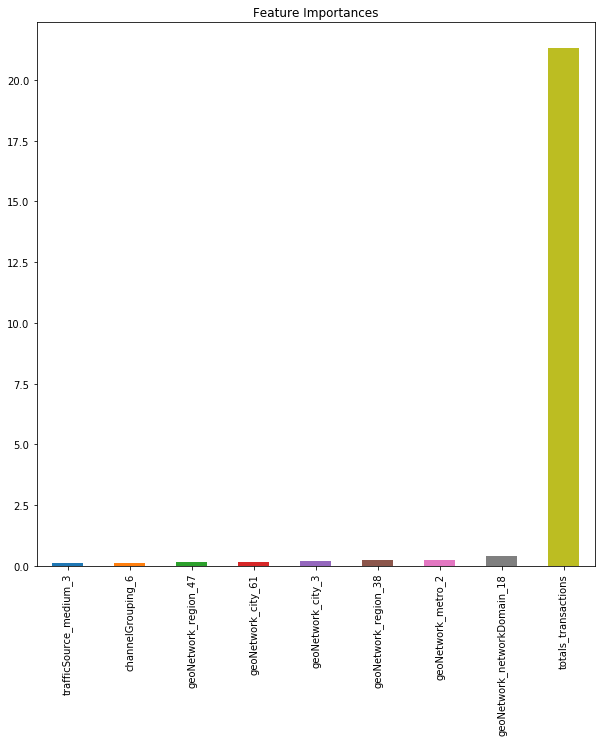

In [31]:
plt.figure(figsize=[10,10])
coef2[coef2.sort_values(ascending=False)>0.1].plot(kind='bar', title='Feature Importances')

In [ ]:
coef2.sort_values(ascending=False)

# Decision Tree 

In [6]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target,'totals_totalTransactionRevenue','totals_transactionRevenue']+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
#coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 0.1753
CV Score : Mean - 0.1754 | Std - 0.04189 | Min - 0.1203 | Max - 0.2581
RMSE : 1.589


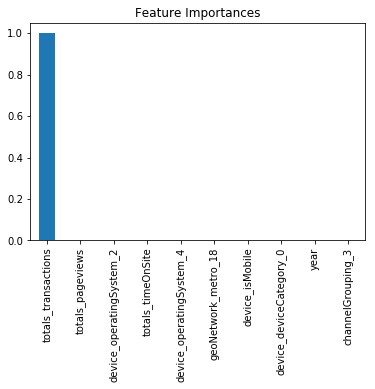

In [32]:
coef3[coef3>0.00001].plot(kind='bar', title='Feature Importances')

# Random Forest

In [3]:
train = pd.read_csv('train_modified.csv', index_col=0, dtype={"fullVisitorId": str})
test = pd.read_csv('test_modified.csv', index_col=0, dtype={"fullVisitorId": str})

In [175]:
test.shape

(167538, 433)

In [4]:
train.head()

,fullVisitorId,year,month,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,device_isMobile,channelGrouping_0,...,trafficSource_source_13,trafficSource_source_14,trafficSource_source_15,trafficSource_source_16,trafficSource_source_17,trafficSource_source_18,trafficSource_source_19,trafficSource_source_20,trafficSource_source_21,totals_transactionRevenue_log
0,3038793126460,2017,11,2.0,1.0,3.0,0.0,0.0,True,0,...,0,0,0,0,0,0,0,0,0,-4.60517
1,5103959234087,2016,8,8.0,0.0,202.0,0.0,0.0,True,0,...,0,0,0,0,0,0,0,0,0,-4.60517
2,10278554503158,2016,10,8.0,0.0,194.0,0.0,0.0,False,0,...,0,0,0,0,0,0,0,0,0,-4.60517
3,10438463470860,2017,11,5.0,1.0,45.0,0.0,0.0,False,0,...,0,0,0,0,0,0,0,0,0,-4.60517
4,17196000342279,2017,10,2.0,1.0,16.0,0.0,0.0,False,0,...,0,0,0,0,0,0,0,0,0,-4.60517


In [9]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target,'totals_totalTransactionRevenue','totals_transactionRevenue']+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)



Model Report
RMSE : 0.1767
CV Score : Mean - 0.1741 | Std - 0.04193 | Min - 0.1203 | Max - 0.2565
RMSE : 1.59


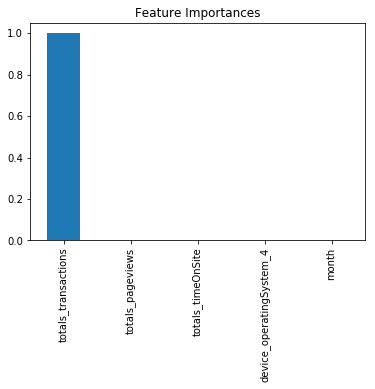

In [25]:
coef5[coef5>0.00001].plot(kind='bar', title='Feature Importances')